# **Heart Attack Prediction and Analysis**


## **About this dataset**

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina

Value 2: atypical angina

Value 3: non-anginal pain

Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal

Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 

      1= more chance of heart attack

**Source: https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from scipy import stats

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
from pylab import rcParams
rcParams['figure.figsize']=15,8

In [3]:
df= pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

#### This dataset having `303` records and `14` features

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### All data types features are:`int64` and `float64`

#### Checking for `duplicate` records in dataset

In [6]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)

Number of duplicate rows ::  (1, 14)


##### we have `1` duplicate record.
##### `drop` duplicate record
##### `rechecking` for duplicate

In [7]:
df = df.drop_duplicates()
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)

Number of duplicate rows ::  (0, 14)


In [50]:
#### `rechecking` for shape of dataset
df.shape

(302, 14)

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

#### This dataset do not having any null values

In [9]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Outlier treatment

#### Removing outliers using `Z-score`

In [11]:
z = np.abs(stats.zscore(df))
data1 = df[(z<3).all(axis=1)]
data1.shape

(287, 14)

#### After removing we have 287 records and 14 features

### Check correlation of all features

<AxesSubplot:>

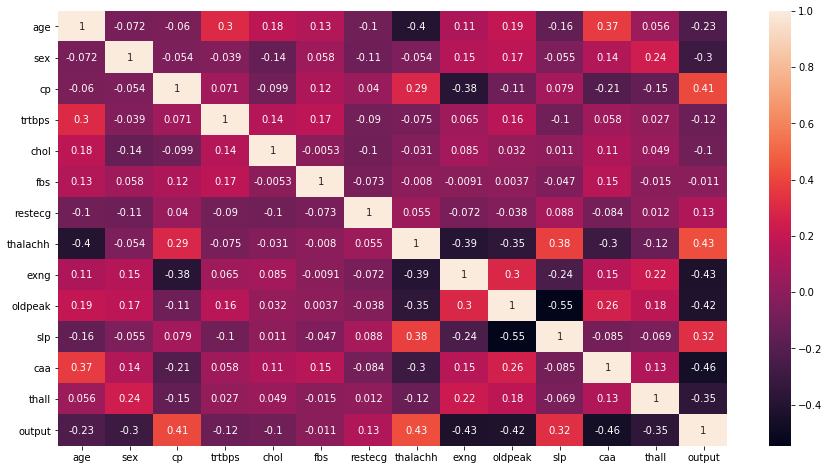

In [12]:
sns.heatmap(data1.corr(),annot=True)

### Visualization of features

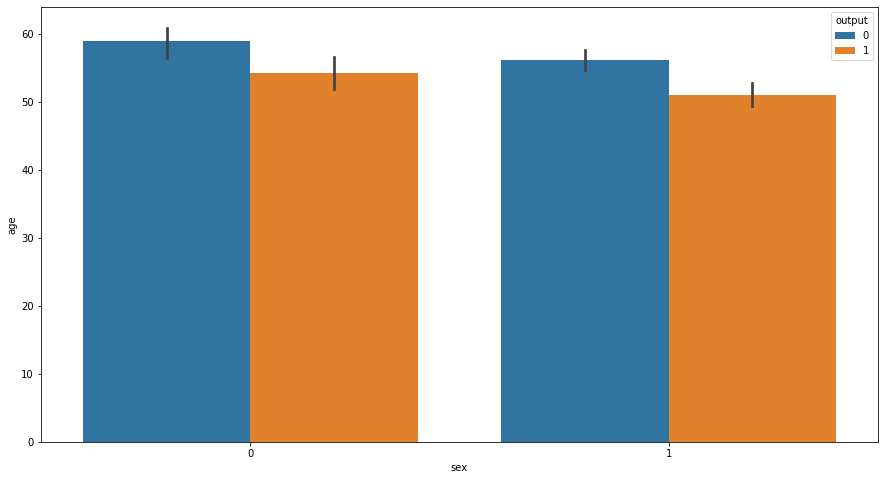

In [13]:
sns.barplot(x=data1['sex'],y=data1['age'],hue=data1['output'])
plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

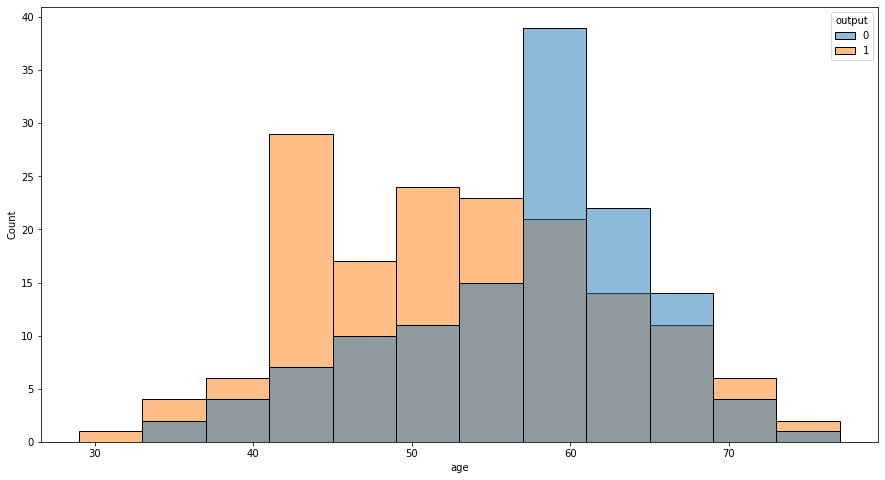

In [14]:
sns.histplot(data1,x='age',hue='output',stat='count')

<AxesSubplot:xlabel='age', ylabel='cp'>

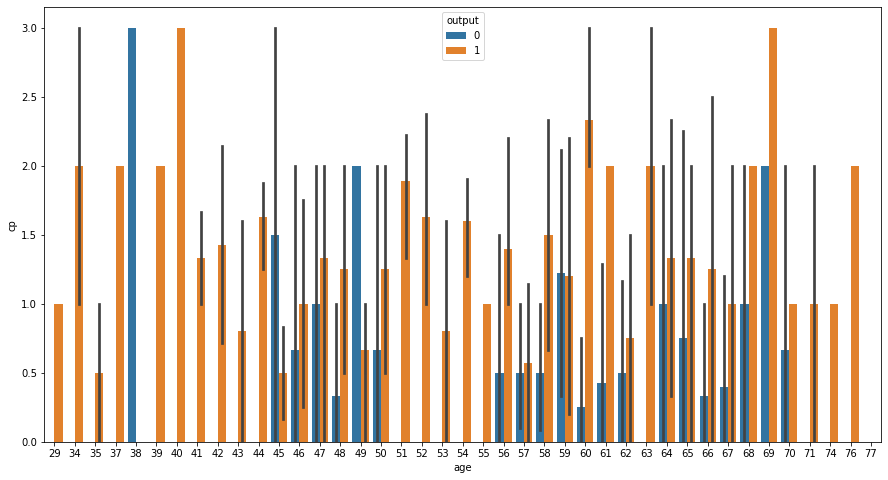

In [15]:
sns.barplot(x='age',y='cp',hue='output',data=data1)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


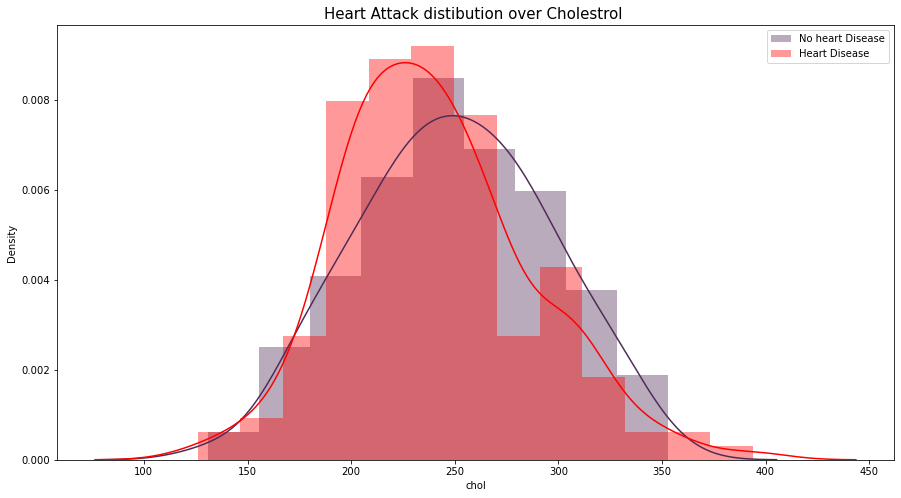

In [16]:
sns.distplot(data1[data1['output'] == 0]["chol"], color='#512b58',label='No heart Disease') 
sns.distplot(data1[data1['output'] == 1]["chol"], color='#FF0000',label='Heart Disease') #Red for heart disease
plt.title('Heart Attack distibution over Cholestrol ', fontsize=15)
plt.legend()
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


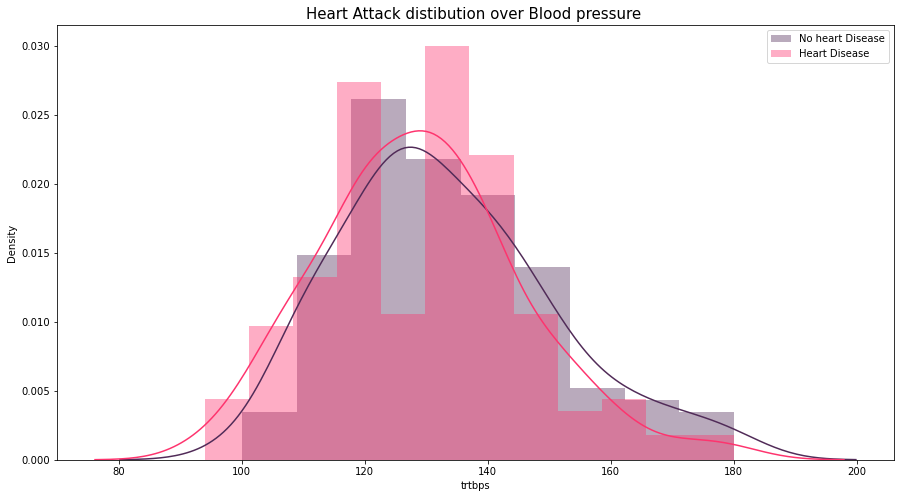

In [18]:
sns.distplot(data1[data1['output'] == 0]["trtbps"], color='#512b58',label='No heart Disease') 
sns.distplot(data1[data1['output'] == 1]["trtbps"], color='#fe346e',label='Heart Disease') #Red for heart disease
plt.title('Heart Attack distibution over Blood pressure ', fontsize=15)
plt.legend()
plt.show()

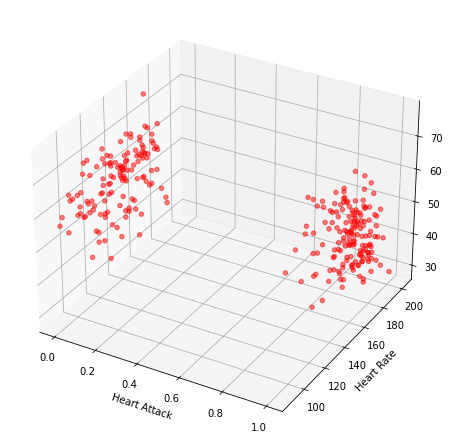

In [19]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
ax.scatter(data1["output"], data1["thalachh"],data1["age"],  c="red", s=20, alpha=0.5)
plt.xlabel('Heart Attack')
plt.ylabel('Heart Rate')
plt.show()

In [20]:
import matplotlib

import warnings
warnings.filterwarnings('ignore')

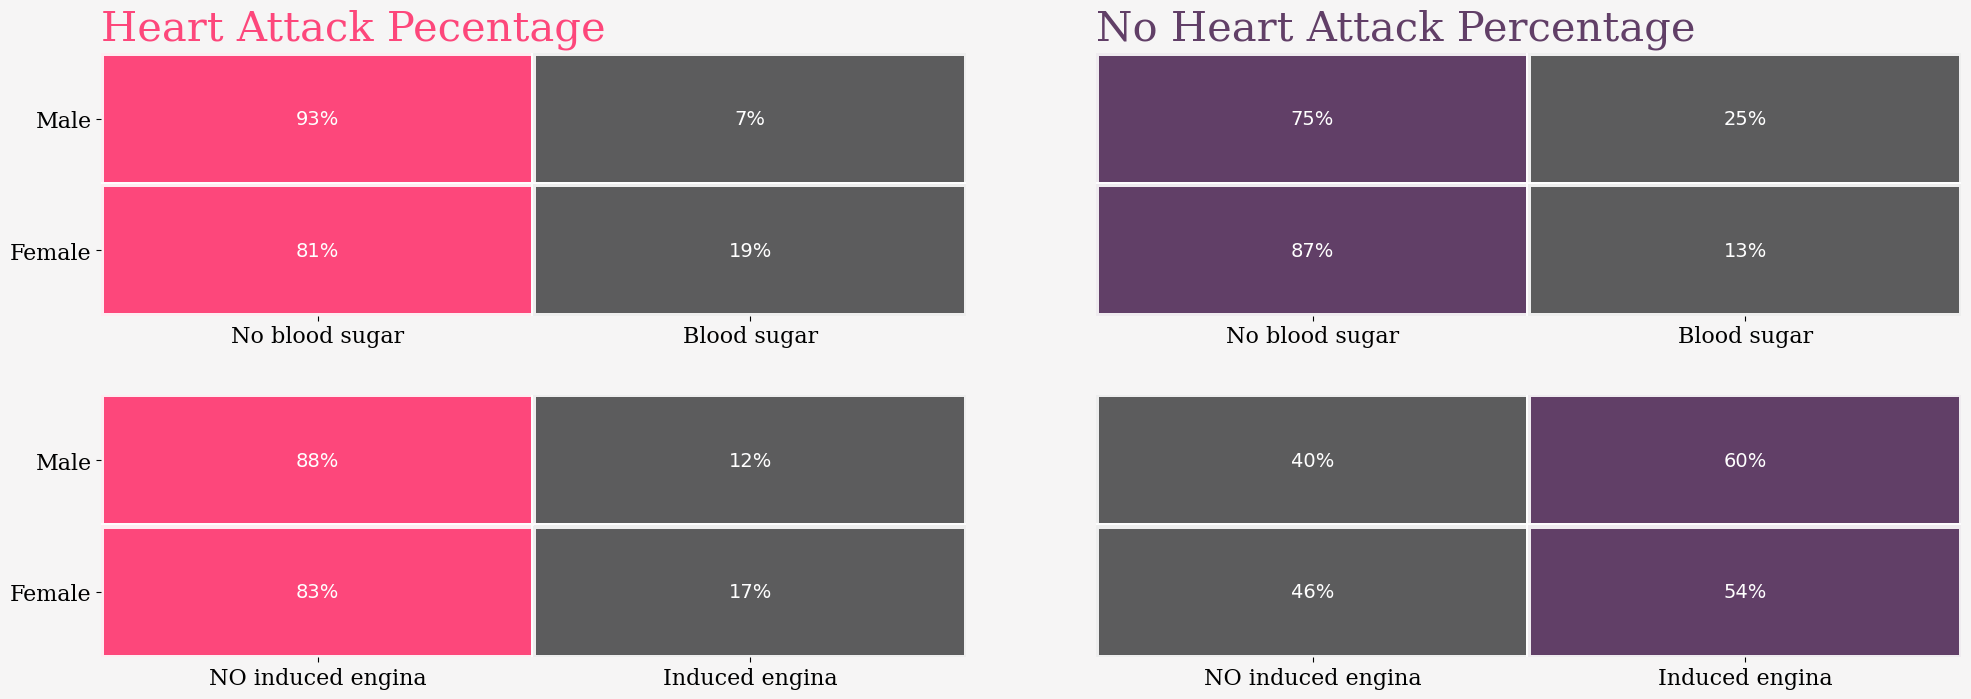

In [21]:
fig = plt.figure(figsize=(24,8), dpi = 100)
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.15, hspace=0.3)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])


fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')
ax2.set_facecolor('#f6f5f5')
ax3.set_facecolor('#f6f5f5')



# ever_married, gender, residence, heart_disease and work_type

healthy = data1[data1['output']==0]
heart_attack= data1[data1['output']==1]

gender_order = [0,1]
chest_pain = [0,1]
thall = [0,1]
caa = [0,1]

col1 = ["#4b4b4c","#fe346e"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N = 256)
col2 = ["#4b4b4c","#512b58"]
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

heart_attack = pd.crosstab(heart_attack['sex'],[heart_attack['fbs']],normalize='index').loc[gender_order,chest_pain]
no_heart_attack = pd.crosstab(healthy['sex'],[healthy['fbs']], normalize='index').loc[gender_order,chest_pain]

sns.heatmap(ax=ax0, data=heart_attack, linewidths= 0,
            square=False, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col1,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)

sns.heatmap(ax=ax1, data=no_heart_attack, linewidths=0, 
            square=False, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col2,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)

healthy = data1[data1['output']==0]
heart_attack= data1[data1['output']==1]                  
heart_attack = pd.crosstab(heart_attack['sex'],[heart_attack['exng']],normalize='index').loc[gender_order,thall]
no_heart_attack = pd.crosstab(healthy['sex'],[healthy['exng']], normalize='index').loc[gender_order,thall]
sns.heatmap(ax=ax2, data=heart_attack, linewidths= 0,
            square=False, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col1,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)

sns.heatmap(ax=ax3, data=no_heart_attack, linewidths=0, 
            square=False, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col2,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)


ax0.text(0,-0.1,'Heart Attack Pecentage ', {'font':'serif', 'color':"#fe346e", 'size':30},alpha = 0.9)
ax1.text(0,-0.1,'No Heart Attack Percentage', {'font':'serif', 'color':"#512b58", 'size':30}, alpha =0.9)

ax0.axes.set_xticklabels(['No blood sugar', 'Blood sugar'], {'font':'serif', 'color':'black', 'size':16})
ax1.axes.set_xticklabels(['No blood sugar', 'Blood sugar'], {'font':'serif', 'color':'black', 'size':16})
ax2.axes.set_xticklabels(['NO induced engina','Induced engina'], {'font':'serif', 'color':'black', 'size':16})
ax3.axes.set_xticklabels(['NO induced engina','Induced engina'], {'font':'serif', 'color':'black', 'size':16})
ax0.axes.set_yticklabels(['Male','Female'], {'font':'serif', 'color':'black', 'size':16}, rotation = 0)
ax2.axes.set_yticklabels(['Male','Female'], {'font':'serif', 'color':'black', 'size':16}, rotation = 0)

ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax3.set_xlabel('')
ax3.set_ylabel('')

ax1.axes.get_yaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)

fig.show()

### Split `train` and `test`
Before implementing any classification algorithm, we will divide our dataset into training data and test data. I have used 80% of the data for training and the remaining 20% will be used for testing.

In [36]:
y=data1['output']
X = data1.drop('output', axis=1)
print(X.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  
0    0      1  
1    0      2  
2    0      2  
3    0      2  
4    0      2  


In [25]:
#features
names = ['Age', 'Sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix

### Build models

Accuracy of logistic regression classifier: 91.38%


<AxesSubplot:title={'center':'Confusion metric'}>

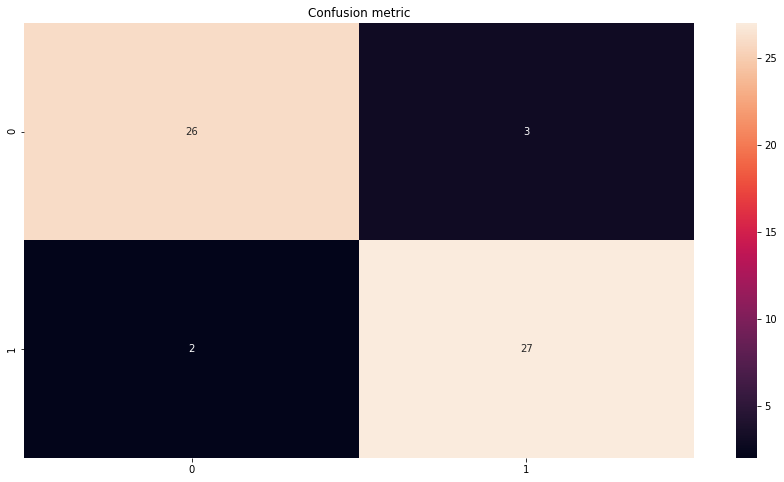

In [40]:
#Logistic Regression

logReg = LogisticRegression(random_state=0)
logReg.fit(X_train, y_train)

#Check prediction of Logistic Regression
y_pred_logReg = logReg.predict(X_test)

#Model Accuracy
print("Accuracy of logistic regression classifier: %.2f%%" % (metrics.accuracy_score(y_test,y_pred_logReg)*100.0))

#Confusion matrix
plt.title("Confusion metric")
sns.heatmap(confusion_matrix(y_test, y_pred_logReg), annot = True)

#### The accuracy of `logistic regression` classifier  is `91.38%`.

Accuracy of Decision Tree Classifier: 81.03%


<AxesSubplot:title={'center':'Confusion metric'}>

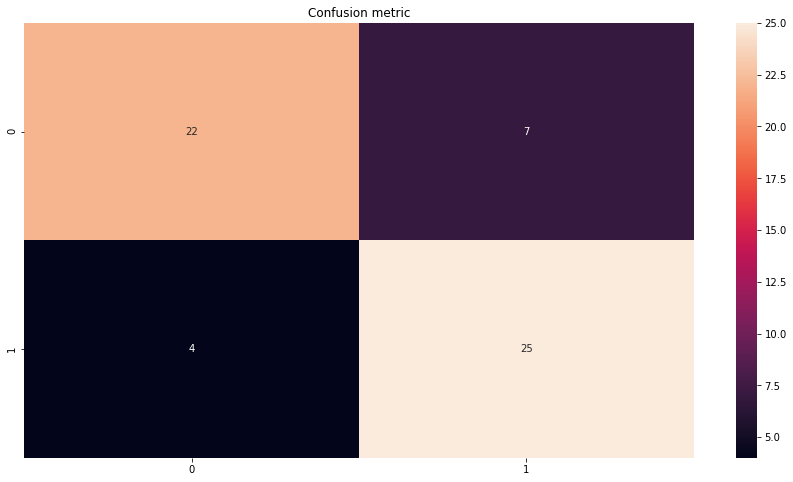

In [41]:
#Decision Tree Classifier

decTree = DecisionTreeClassifier(max_depth=6, random_state=0)
decTree.fit(X_train,y_train)

#Check predicition of Decision Tree Classifier
y_pred_decTree = decTree.predict(X_test)

#Model Accuracy
print("Accuracy of Decision Tree Classifier: %.2f%%" % (metrics.accuracy_score(y_test,y_pred_decTree)*100.0))

#Confusion matrix
plt.title("Confusion metric")
sns.heatmap(confusion_matrix(y_test, y_pred_decTree), annot = True)

#### The accuracy of `Decision Tree` classifier  is `81.03%`.

Accuracy of Random Forest Classifier: 86.21%
Feature: Age, Score: 0.09%
Feature: Sex, Score: 0.05%
Feature: cp, Score: 0.13%
Feature: trtbps, Score: 0.07%
Feature: chol, Score: 0.09%
Feature: fbs, Score: 0.01%
Feature: restecg, Score: 0.02%
Feature: thalachh, Score: 0.11%
Feature: exng, Score: 0.04%
Feature: oldpeak, Score: 0.12%
Feature: slp, Score: 0.05%
Feature: caa, Score: 0.11%
Feature: thall, Score: 0.11%


<AxesSubplot:title={'center':'Confusion metric'}>

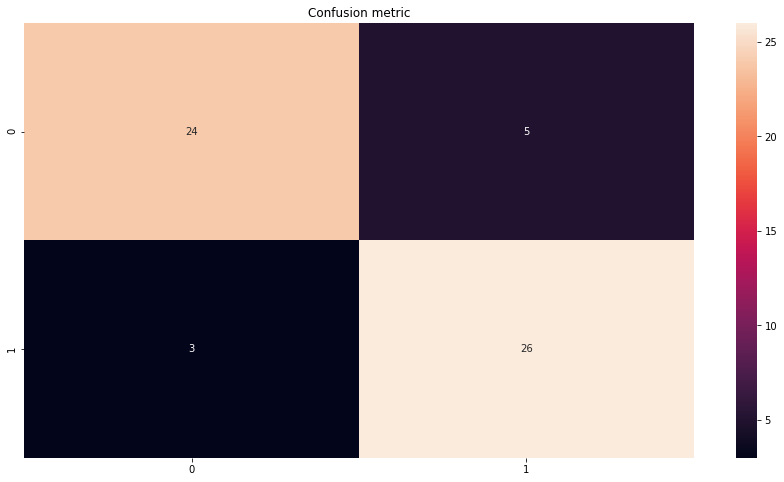

In [47]:
# Random forest classifier
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train,y_train)

#Check prediction of Random forest classifier
y_pred_rf = rf.predict(X_test)

#Model Accuracy
print("Accuracy of Random Forest Classifier: %.2f%%" % (metrics.accuracy_score(y_test,y_pred_rf)*100.0))

#Find the score of each feature in model
f_imp = rf.feature_importances_
for i,v in enumerate(f_imp):
    print('Feature: %s, Score: %.2f%%' % (names[i],v))
    
#Confusion matrix
plt.title("Confusion metric")
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot = True)

#### The accuracy of `Random Forest` classifier  is `86.21%`.

Accuracy of K-Neighbours classifier: 63.79%


<AxesSubplot:title={'center':'Confusion metric'}>

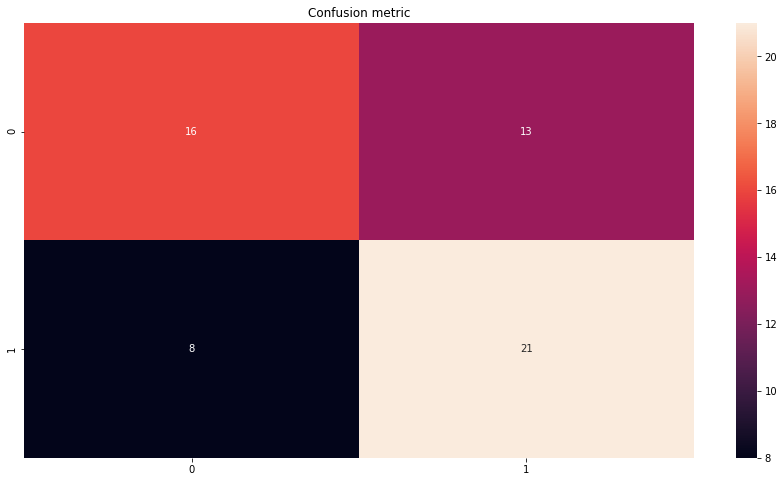

In [44]:
#K Nearest Neighbours Classifier
knc =  KNeighborsClassifier()
knc.fit(X_train,y_train)

#Check prediction of k nearest neighbours classifier
y_pred_knc = knc.predict(X_test)

#Model Accuracy
print("Accuracy of K-Neighbours classifier: %.2f%%" % (metrics.accuracy_score(y_test,y_pred_knc)*100.0))

#Confusion matrix
plt.title("Confusion metric")
sns.heatmap(confusion_matrix(y_test, y_pred_knc), annot = True)

#### The accuracy of `K Nearest Neighbours` classifier  is `63.79%`.

Accuracy of Gaussian NB: 89.66%


<AxesSubplot:title={'center':'Confusion metric'}>

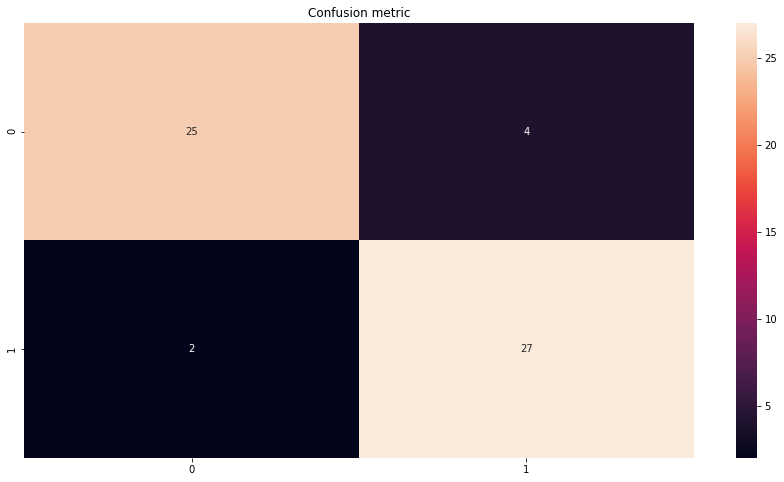

In [48]:
#Gaussian NB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

#Check prediction of gaussian NB
y_pred_gnb = gnb.predict(X_test)

#Model Accuracy
print("Accuracy of Gaussian NB: %.2f%%" % (metrics.accuracy_score(y_test,y_pred_gnb)*100.0))

#Confusion matrix
plt.title("Confusion metric")
sns.heatmap(confusion_matrix(y_test, y_pred_gnb), annot = True)

#### The accuracy of `Gaussian NB` classifier  is `89.66%`.

[00:21:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBclassifier: 81.03%


<AxesSubplot:title={'center':'Confusion metric'}>

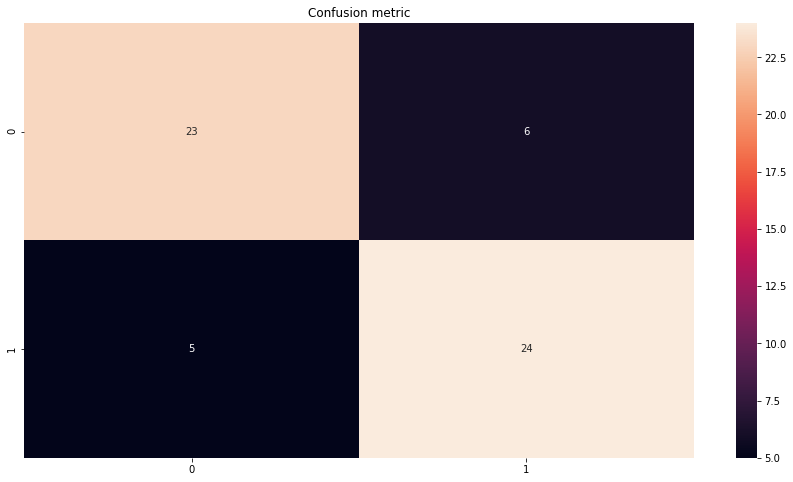

In [46]:
from xgboost import XGBClassifier

xbgc = XGBClassifier()
xbgc.fit(X_train, y_train)

#Check prediction of xgbclassifier
y_pred_xbgc = xbgc.predict(X_test)

#Model Accuracy
print("Accuracy of XGBclassifier: %.2f%%" % (metrics.accuracy_score(y_test,y_pred_xbgc)*100.0))

#Confusion matrix
plt.title("Confusion metric")
sns.heatmap(confusion_matrix(y_test, y_pred_xbgc), annot = True)

#### The accuracy of `XGB` classifier  is `81.03%`.

### Results

In [49]:
#Models and their accuracy
print("*****************Models and their accuracy*****************")
print("Logistic Regression Classifier: %.2f%%" % (metrics.accuracy_score(y_test,y_pred_logReg)*100.0))
print("Decision Tree : %.2f%%" % (metrics.accuracy_score(y_test,y_pred_decTree)*100.0))
print("Random Forest Classifier: %.2f%%" % (metrics.accuracy_score(y_test, y_pred_rf)*100.0))
print("K Neighbours Classifier: %.2f%%" % (metrics.accuracy_score(y_test,y_pred_knc)*100.0))
print("Gaussian NB: %.2f%%" % (metrics.accuracy_score(y_test,y_pred_gnb)*100.0))
print("XGBclassifier: %.2f%%" % (metrics.accuracy_score(y_test,y_pred_xbgc)*100.0))

*****************Models and their accuracy*****************
Logistic Regression Classifier: 91.38%
Decision Tree : 81.03%
Random Forest Classifier: 86.21%
K Neighbours Classifier: 63.79%
Gaussian NB: 89.66%
XGBclassifier: 81.03%


### Conclusion

##### After implementing six classification models and comparing their accuracy, we can conclude that for this dataset `Logistic Regression Classifier` is the appropriate model to be used.

### *********END********